In [3]:
import django
django.setup()
from filterbank.models import Representation

In [8]:
rep: Representation = Representation.objects.filter(name__startswith="Initial").first()


In [13]:
%%timeit
array = rep.nparray.get_array()

Trying to access file /code/media/representation_h5files/BIC_CS_R(Alexa568)-gp-NeuN_G(Alexa488)-rb-bIVSpec_B(Alexa647)-TOPRO_600x_hippocampal-cultures_ctrl_2.nd2 (series 1).h5 to get array
Trying to access file /code/media/representation_h5files/BIC_CS_R(Alexa568)-gp-NeuN_G(Alexa488)-rb-bIVSpec_B(Alexa647)-TOPRO_600x_hippocampal-cultures_ctrl_2.nd2 (series 1).h5 to get array
Trying to access file /code/media/representation_h5files/BIC_CS_R(Alexa568)-gp-NeuN_G(Alexa488)-rb-bIVSpec_B(Alexa647)-TOPRO_600x_hippocampal-cultures_ctrl_2.nd2 (series 1).h5 to get array
Trying to access file /code/media/representation_h5files/BIC_CS_R(Alexa568)-gp-NeuN_G(Alexa488)-rb-bIVSpec_B(Alexa647)-TOPRO_600x_hippocampal-cultures_ctrl_2.nd2 (series 1).h5 to get array
Trying to access file /code/media/representation_h5files/BIC_CS_R(Alexa568)-gp-NeuN_G(Alexa488)-rb-bIVSpec_B(Alexa647)-TOPRO_600x_hippocampal-cultures_ctrl_2.nd2 (series 1).h5 to get array
Trying to access file /code/media/representation_h5file

In [16]:
array.shape
import numpy as np

In [45]:
image = array[:,:,:,:,0]
image = np.interp(image, (image.min(),image.max()), (0,256))
image = image.swapaxes(2, 3)
image = image.astype('u1')
shape_3d = image.shape[0:3]
print(shape_3d)
rgb_dtype = np.dtype([('R', 'u1'), ('G', 'u1'), ('B', 'u1')])
image =image.view(rgb_dtype).reshape(shape_3d)
        

(1024, 1024, 14)


ValueError: To change to a dtype of a different size, the array must be C-contiguous

In [21]:
import matplotlib.pyplot as plt

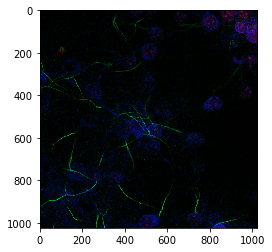

In [34]:
plt.imshow(image[:,:,:,3])

In [42]:
import nibabel as nib
img1 = nib.Nifti1Image(image, np.eye(4))

nib.save(img1,"hallo.nii.gz")